# Import Libraries

In [9]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
import cv2

# Import model module

In [10]:
from utils import label_map_util
from utils import visualization_utils as vis_util

# SSD model configurations

## Variables

In [11]:
 #What model to load.
MODEL_NAME = 'my_out_inference_graph'
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('training', 'object-detection.pbtxt')

NUM_CLASSES = 2

## Loading Tensorflow model into memory

In [12]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map

Label maps map indices to category names, so that when our convolution network predicts 2, we know that this corresponds to "my image"

In [13]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Run the model and show results using Webcam

In [17]:
cap = cv2.VideoCapture(0)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        %matplotlib inline
        img_counter=0
        while True:
            ret, image_np = cap.read()
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
            [boxes, scores, classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
        
            
            cv2.imshow('object detection', cv2.resize(image_np, (800,600)))
            
            k = cv2.waitKey(1)
            if k%256 == 32:
                # Space pressed
                cv2.imwrite('webcam_results/result{}.png'.format(img_counter), image_np)
                img_counter+=1
               
        
            
            elif cv2.waitKey(27) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()

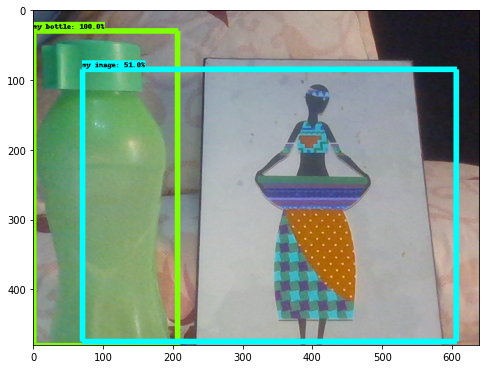

In [18]:
result = cv2.imread('webcam_results/result4.png')
plt.figure(figsize=(8,12))
plt.imshow(result)

# show the loss while training

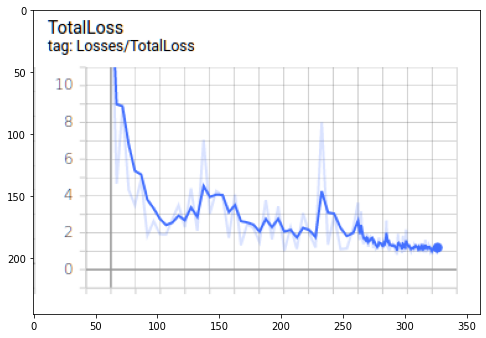

In [19]:
total_loss = cv2.imread('total loss.png')
plt.figure(figsize=(8,12))
plt.imshow(total_loss)


> taken from tensorboard